## Import Packages

In [1]:
# EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprcessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Modeling
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNet
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error

# Plot Settings
sns.set(rc= {'figure.figsize': [15, 7]}, font_scale= 1.2)
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

## Data Cleaning

### Import data

In [2]:
df = pd.read_csv('./exams.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000
std,15.402871,14.737272,15.600985
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.500000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
462,female,group C,some college,free/reduced,completed,28,44,50
577,male,group C,master's degree,standard,none,68,60,62
494,male,group D,high school,free/reduced,none,65,63,60
654,female,group B,associate's degree,standard,none,54,60,56
286,female,group D,high school,standard,none,82,89,84


In [7]:
df['avg score'] = (df['math score'] + df['reading score'] + df['writing score']) // 3

In [8]:
df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg score
966,female,group A,some high school,free/reduced,completed,55,73,70,66
789,male,group C,some high school,free/reduced,none,62,59,62,61
521,female,group C,bachelor's degree,standard,completed,65,83,82,76
772,female,group C,associate's degree,standard,completed,72,76,78,75
230,female,group C,high school,standard,none,75,90,78,81


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
 8   avg score                    1000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [10]:
df['gender'].value_counts()

male      517
female    483
Name: gender, dtype: int64

In [11]:
df['race/ethnicity'].value_counts()

group C    323
group D    262
group B    205
group E    131
group A     79
Name: race/ethnicity, dtype: int64

In [12]:
df['parental level of education'].value_counts()

some college          222
associate's degree    203
high school           202
some high school      191
bachelor's degree     112
master's degree        70
Name: parental level of education, dtype: int64

In [13]:
df['lunch'].value_counts()

standard        652
free/reduced    348
Name: lunch, dtype: int64

In [14]:
df['test preparation course'].value_counts()

none         665
completed    335
Name: test preparation course, dtype: int64

In [15]:
df.drop(['math score', 'reading score', 'writing score'], axis= 1, inplace= True)

df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,avg score
601,female,group D,high school,standard,none,72
655,male,group C,associate's degree,standard,completed,79
465,male,group B,some high school,standard,completed,62
622,female,group B,some college,standard,completed,81
404,female,group A,high school,standard,none,77


In [16]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
avg score                      0
dtype: int64

## Data Visualization

In [17]:
df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,avg score
865,male,group B,some high school,free/reduced,completed,73
57,male,group D,associate's degree,standard,completed,86
566,male,group E,some college,free/reduced,none,58
275,female,group E,some high school,standard,none,79
965,female,group E,bachelor's degree,standard,none,87


Text(0.5, 1.0, 'Different ethnical groups count')

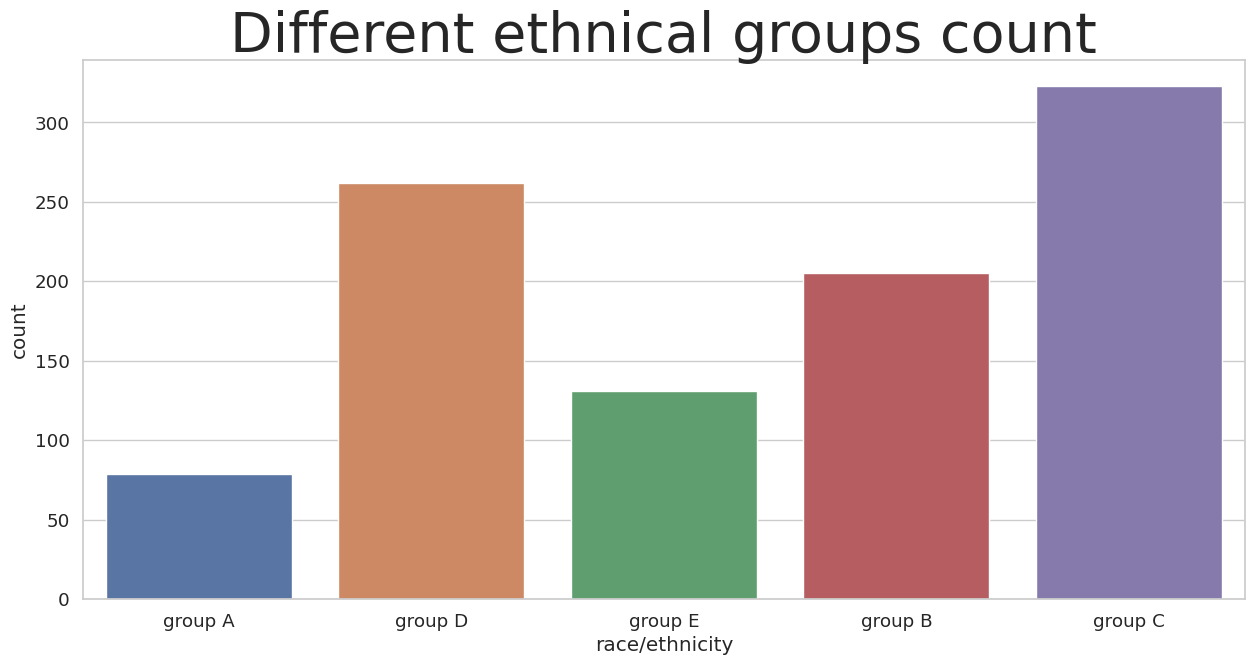

In [18]:
sns.countplot(df['race/ethnicity'])
plt.title('Different ethnical groups count', fontsize= 40)

Text(0.5, 1.0, 'How many students completed preparation course')

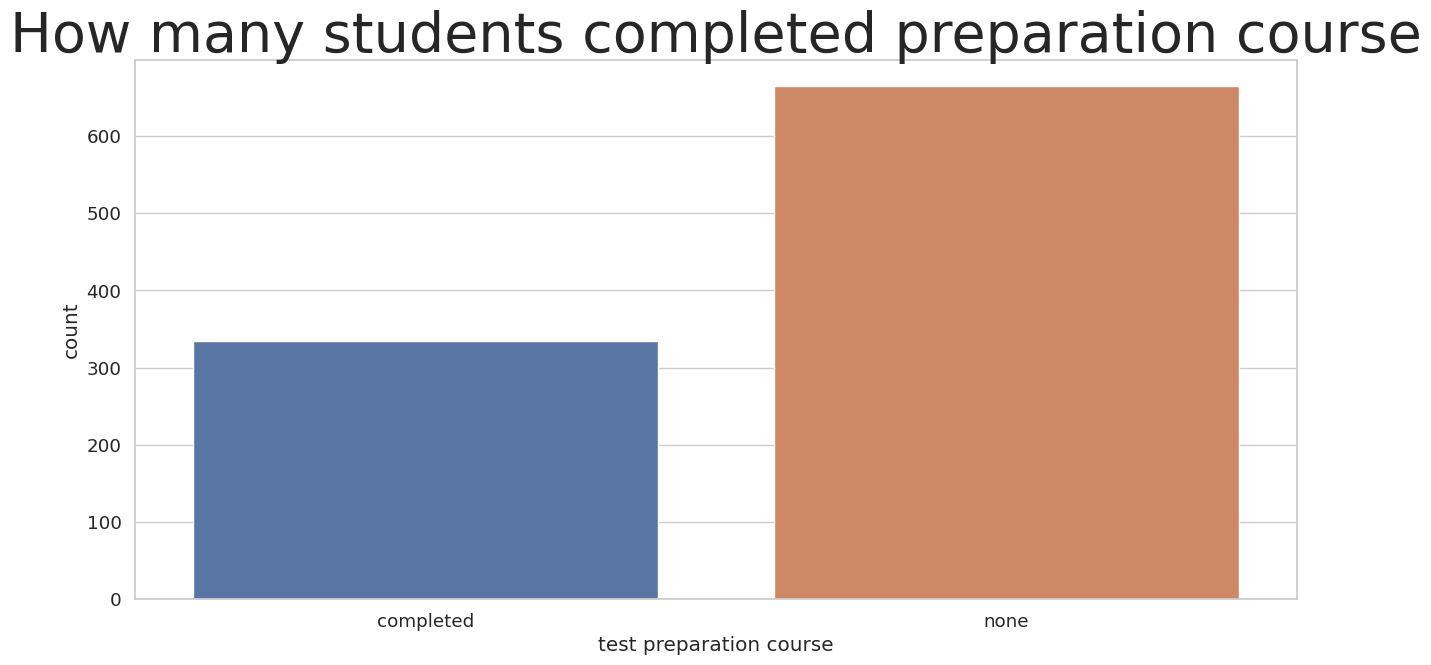

In [19]:
sns.countplot(df['test preparation course'])
plt.title('How many students completed preparation course', fontsize= 40)

Text(0.5, 1.0, 'How score is affected by preparation course')

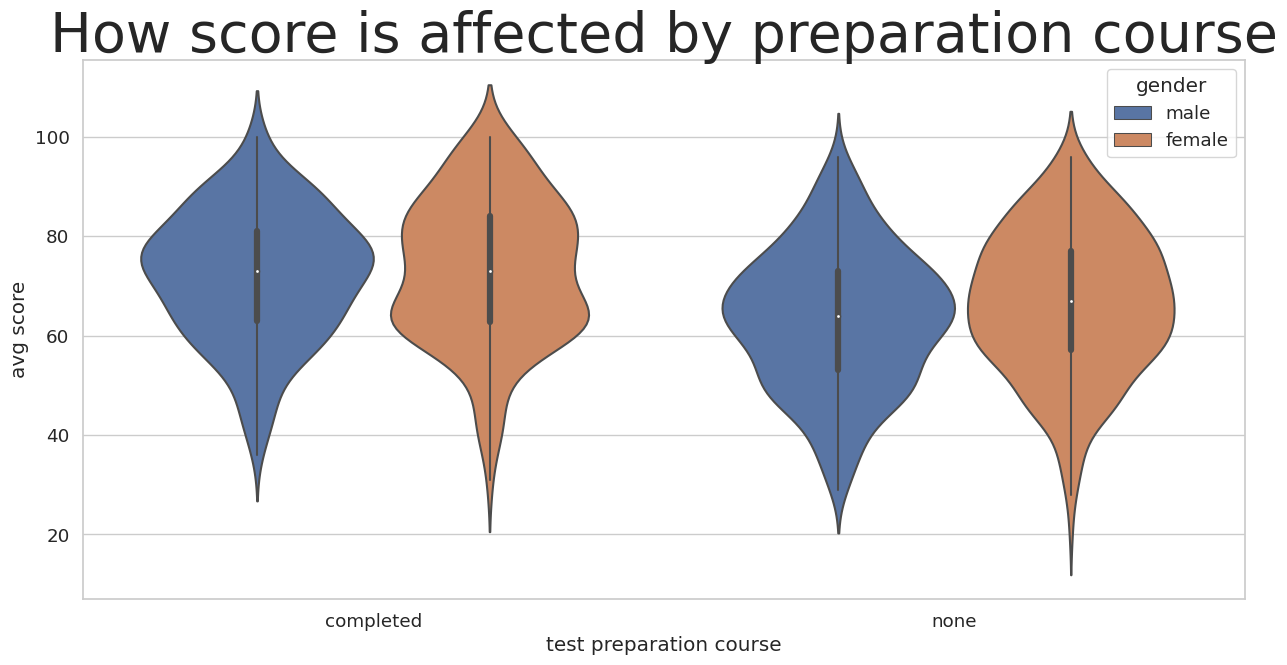

In [20]:
sns.violinplot(x= 'test preparation course', y= 'avg score', hue= 'gender', data= df)
plt.title('How score is affected by preparation course', fontsize= 40)

Text(0.5, 1.0, 'How ethnical group affect score')

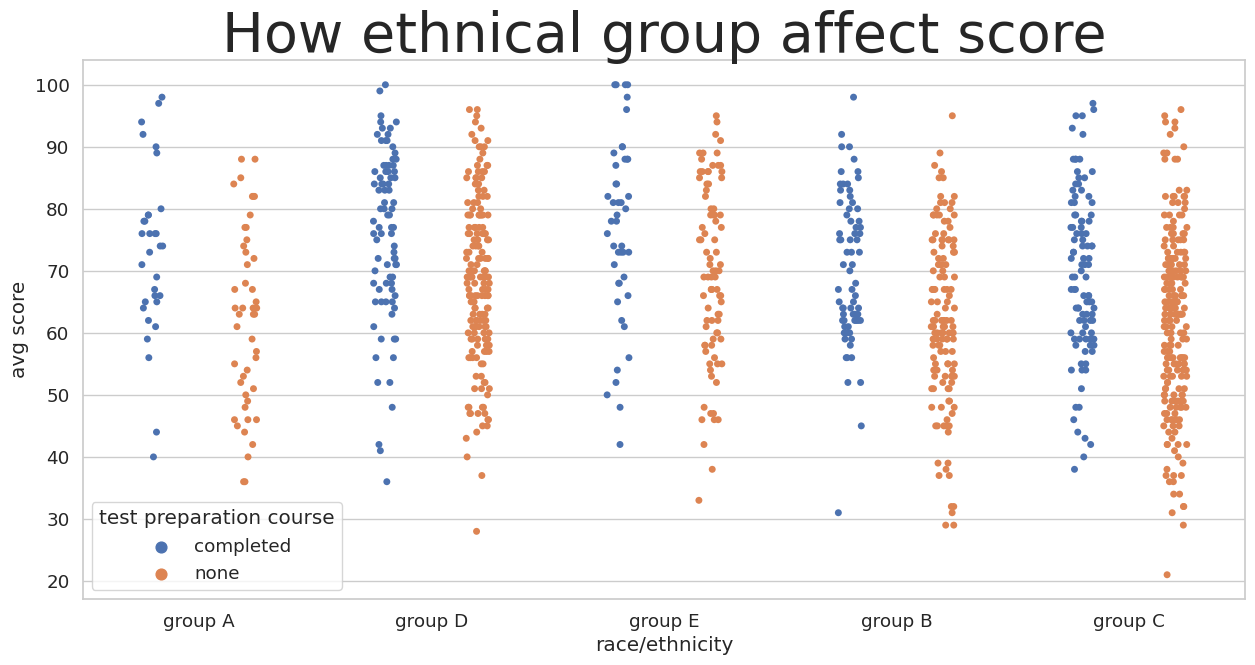

In [21]:
sns.stripplot(x= 'race/ethnicity', y= 'avg score', hue= 'test preparation course', dodge= True, data= df)
plt.title('How ethnical group affect score', fontsize= 40)

## Data Preprocessing

In [22]:
df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,avg score
59,male,group E,some high school,standard,none,55
482,female,group E,master's degree,free/reduced,none,82
554,male,group D,associate's degree,free/reduced,completed,73
215,female,group B,bachelor's degree,free/reduced,none,57
953,male,group B,associate's degree,standard,completed,65


### Gender

In [23]:
gender = {
    'male': 0,
    'female': 1
}

In [24]:
df['gender'] = df['gender'].map(gender)

### race/ethnicity

In [25]:
df['race/ethnicity'].value_counts()

group C    323
group D    262
group B    205
group E    131
group A     79
Name: race/ethnicity, dtype: int64

In [26]:
eth = {
    'group A': 0,
    'group E': 1,
    'group B': 2,
    'group D': 3,
    'group C': 4
}

In [27]:
df['race/ethnicity'] = df['race/ethnicity'].map(eth)

In [28]:
df['race/ethnicity'].value_counts()

4    323
3    262
2    205
1    131
0     79
Name: race/ethnicity, dtype: int64

### Test prepation course

In [29]:
tpc = {
    'none': 0,
    'completed': 1
}

In [30]:
df['test preparation course'] = df['test preparation course'].map(tpc)

In [31]:
df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,avg score
701,0,3,some high school,standard,1,41
538,1,3,high school,standard,0,70
555,1,3,bachelor's degree,free/reduced,0,46
196,0,3,bachelor's degree,standard,0,48
176,1,4,bachelor's degree,standard,0,55


### Clasify Data

In [32]:
nums = df.select_dtypes(exclude= 'object').columns
nums

Index(['gender', 'race/ethnicity', 'test preparation course', 'avg score'], dtype='object')

In [33]:
cats = df.select_dtypes(include= 'object').columns
cats

Index(['parental level of education', 'lunch'], dtype='object')

### Handling nominal data

In [34]:
df = pd.get_dummies(df, columns= cats, drop_first= True)

### Splitting Data

In [35]:
# Define dataset
X, y = df.drop('avg score', axis= 1), df['avg score']

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 0)

In [36]:
X_train

,gender,race/ethnicity,test preparation course,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard
105,1,3,0,1,0,0,0,0,1
68,0,2,0,0,1,0,0,0,1
479,0,4,0,0,0,0,0,0,0
399,1,0,1,0,0,0,1,0,0
434,0,4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
835,1,2,0,0,0,0,0,1,1
192,0,1,0,0,0,0,0,1,0
629,0,4,0,0,1,0,0,0,1
559,0,1,0,0,1,0,0,0,0


### Handling numerical

In [37]:
nums = nums.drop('avg score')

In [38]:
scalar = StandardScaler()
scalar.fit(X_train[nums])

StandardScaler()

In [39]:
X_train[nums] = scalar.transform(X_train[nums])
X_test[nums] = scalar.transform(X_test[nums])

## Modeling

In [47]:
models = {
    'Gaussian': GaussianNB(),
    'Linear Regression': LinearRegression(),
    'Lasso': LassoCV(),
    'Ridge': RidgeCV(),
    'ElasticNet': ElasticNet()
}

In [48]:
Results = {
    'Model': [],
    'Train Score': [],
    'Test Score': [],
    'RMSE': []
}

In [49]:
for name, model in models.items():
    model.fit(X_train, y_train)
    train_s = model.score(X_train, y_train)
    test_s = model.score(X_test, y_test)
    y_pred = model.predict(X_test)
    RMSE = mean_squared_error((y_pred), y_test)
    Results['Model'].append(name)
    Results['Train Score'].append(train_s)
    Results['Test Score'].append(test_s)
    Results['RMSE'].append(RMSE)
    print('Model: ', name)
    print('Train Score: ', train_s)
    print('Test Score: ', test_s)
    print('RMSE: ', round(RMSE, 2))
    print('=================================')

Model:  Gaussian
Train Score:  0.054285714285714284
Test Score:  0.0
RMSE:  724.77
Model:  Linear Regression
Train Score:  0.28037204209361843
Test Score:  0.14637991554235275
RMSE:  160.91
Model:  Lasso
Train Score:  0.2803323476142997
Test Score:  0.14717200433088773
RMSE:  160.76
Model:  Ridge
Train Score:  0.27925941442172386
Test Score:  0.15223328340007358
RMSE:  159.81
Model:  ElasticNet
Train Score:  0.13491817327302613
Test Score:  0.10003401033799464
RMSE:  169.64


In [50]:
scores = pd.DataFrame(Results)

Text(0.5, 1.0, 'Train Score')

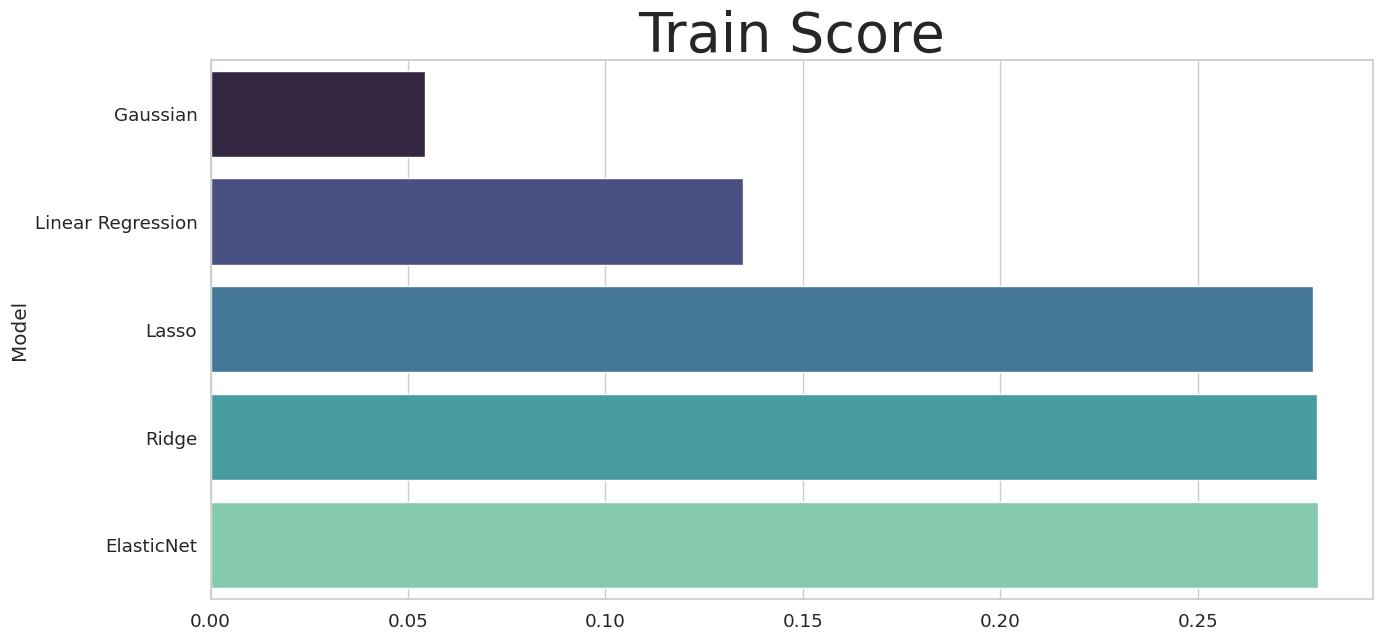

In [51]:
sns.barplot(y= scores['Model'], x= sorted(scores['Train Score']), palette= 'mako')
plt.title('Train Score', fontsize= 40)

Text(0.5, 1.0, 'Test Score')

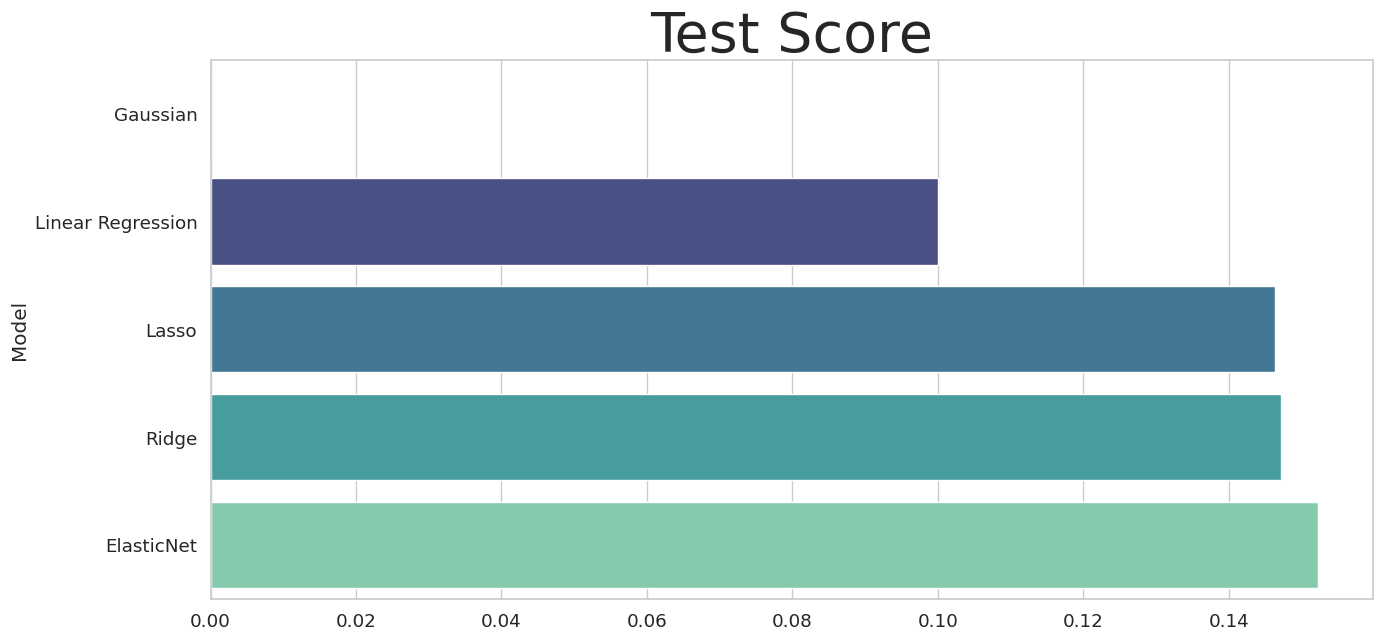

In [52]:
sns.barplot(y= scores['Model'], x= sorted(scores['Test Score']), palette= 'mako')
plt.title('Test Score', fontsize= 40)

Text(0.5, 1.0, 'RMSE')

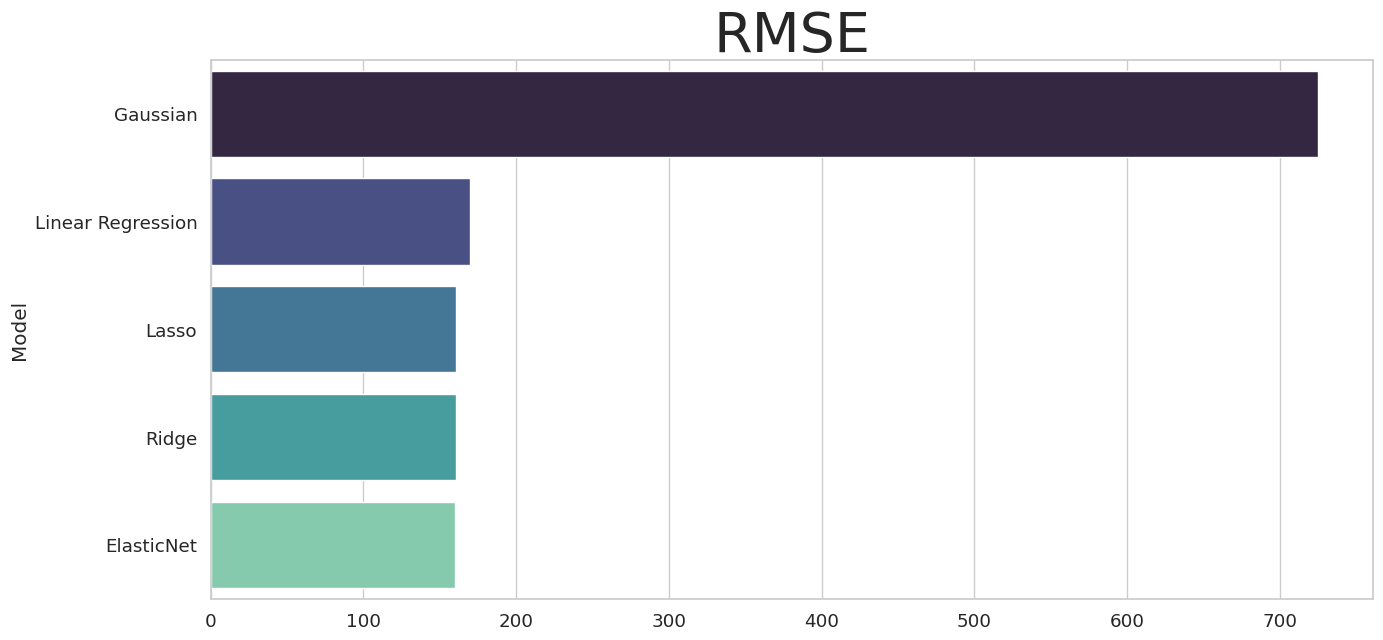

In [53]:
sns.barplot(y= scores['Model'], x= sorted(scores['RMSE'], reverse= True), palette= 'mako')
plt.title("RMSE", fontsize= 40)

## Conclusion

Need to use different algorithms

Current best: <b>ElasticNet</b>